<a href="https://colab.research.google.com/github/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/L07b_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L07b- Generative Adversarial Network (GAN)


   - Developed by **Armin Norouzi**
   - Compatible with Google Colaboratory


**Table of Contents:**
1.  Intorduction to Transformer
2.  Tensorflow implementation of Transformer


# 1. Intorduction to Transformer
# 1.1. Generative Adversarial Network vs Transformer:

In the previous section, we learn what GAN is and how it works. Now let's see what is transformers and why we need such a thing.

We learned GAN is a type of neural network that consists of two networks, a **generator** and a **discriminator**. The generator tries to create new data samples that are similar to the input data, while the discriminator tries to distinguish between the real and fake data samples. The two networks are trained together in a way that the generator learns to create more realistic samples while the discriminator gets better at distinguishing between the real and fake samples.

On the other hand, the **Transformer** is a type of neural network architecture that was introduced in the field of natural language processing (NLP). It is mainly used for tasks such as **language translation**, **text summarization**, and **language modelling**. The Transformer model consists of an **encoder** and a **decoder** that work together to process input sequences and generate output sequences. The encoder processes the input sequence and produces a hidden representation of the input. The decoder then takes the hidden representation and generates the output sequence. The Transformer uses a **self-attention mechanism** that allows the model to focus on different parts of the input sequence while processing it. Additionally, the Transformer uses a **positional encoding technique** to preserve the order of the input sequence, which is important for language tasks.

While both models are used for different tasks, they do share some similarities. Both GAN and Transformer are deep learning models that are based on neural networks and use backpropagation to train their parameters. Additionally, they both have been used for generating realistic images and natural language text.

However, the key difference between the two models is that GAN is used for generative tasks, while the Transformer is used for tasks related to natural language processing. **GANs generate new samples, while Transformers transform input sequences into output sequences.**

# 1.2. We have RNN and LSTM; why do we need transformers?

While RNNs and LSTMs are powerful models that have been used successfully in many natural language processing tasks, they have certain limitations that can make them less effective for certain tasks. Here are a few reasons why Transformers have emerged as an important alternative to RNNs and LSTMs:

- **Long-term dependencies:** RNNs and LSTMs are designed to capture sequential dependencies in data, which makes them well-suited for modeling time-series data or sequences of variable length. However, they can struggle to capture long-term dependencies in data, particularly when the distance between the relevant elements in the sequence is large. Transformers are designed to explicitly model long-range dependencies using self-attention mechanisms, which allow them to attend to different parts of the input sequence and capture long-term relationships.

- **Parallelization:** RNNs and LSTMs process data sequentially, which can make them slower and more computationally expensive than other models. Transformers, on the other hand, can process the entire input sequence in parallel, which makes them more efficient and faster to train. This is particularly important for large-scale natural language processing tasks that involve processing large amounts of data.

- **Handling variable-length inputs:** RNNs and LSTMs are designed to handle input sequences of variable length, but they can struggle with very long sequences or sequences that contain significant amounts of noise or irrelevant information. Transformers are better suited for handling variable-length inputs and can effectively filter out noise or irrelevant information using their attention mechanisms.

- **Attention-based mechanisms:** Transformers are designed to use attention-based mechanisms, which allow them to dynamically focus on different parts of the input sequence based on the context of the task. This makes them particularly well-suited for tasks that require the model to selectively attend to different parts of the input sequence, such as machine translation or question answering.

## 1.2. Transformer components

We briefly talked about the transformer component; let's dive into it in more detail. 

![picture](https://github.com/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/figures/transformers.png?raw=true) Source: [1-2]

This figure shows transformers architecture schematically. The Transformer architecture consists of an encoder and decoder, which are composed of multiple layers that use attention and self-attention mechanisms to process the input and output sequences. The positional encoding technique is used to encode the position of tokens in the input sequence. These components work together to enable the Transformer to achieve state-of-the-art performance on various natural language processing tasks.

- **Encoder:** The encoder is the part of the Transformer architecture that processes the input sequence and produces a hidden representation of the sequence. The input sequence is first transformed into a sequence of embeddings, which are then fed into a stack of identical layers. Each layer in the encoder stack consists of two sublayers: a self-attention layer and a feedforward layer. The self-attention layer allows the encoder to attend to different parts of the input sequence and capture long-range dependencies, while the feedforward layer applies a nonlinear transformation to the hidden representation.

- **Decoder:** The decoder is the part of the Transformer architecture that generates the output sequence based on the hidden representation produced by the encoder. Like the encoder, the decoder also consists of a stack of identical layers, but each layer has three sublayers: a self-attention layer, an encoder-decoder attention layer, and a feedforward layer. The self-attention layer allows the decoder to attend to different parts of the output sequence, while the encoder-decoder attention layer allows the decoder to attend to different parts of the input sequence.

- **Attention:** Attention is a mechanism in neural networks that allows the model to selectively attend to different parts of the input when making a prediction. In the Transformer architecture, attention is used in both the encoder and decoder. The attention mechanism calculates a weighted sum of the values of the input sequence, where the weights are determined by the similarity between the query and the keys. The attention mechanism allows the model to focus on different parts of the input sequence depending on the task at hand.

- **Self-Attention Mechanism:** Self-attention is a specific type of attention mechanism that is used in the Transformer architecture. In self-attention, the input sequence is transformed into a sequence of query, key, and value vectors. The query vectors are used to calculate the attention weights for each position in the input sequence, based on the similarity between the query vector and the key vectors. The value vectors are then weighted by the attention weights and summed up to produce a weighted representation of the input sequence. This weighted representation is then used as the input for the next layer of the model. Self-attention allows the model to attend to different parts of the input sequence and capture long-range dependencies.

- **Positional Encoding:** Positional encoding is a technique used in the Transformer architecture to encode the position of the tokens in the input sequence. Since the Transformer does not have a recurrence or convolutional structure that can capture the order of the input sequence, the positional encoding is added to each token's embedding to provide the model with information about the position of the token in the sequence. The positional encoding is calculated using a fixed function that takes into account the position of the token in the sequence and the dimension of the embedding. The result is then added to the token's embedding, allowing the model to differentiate between tokens that appear in different positions in the input sequence.


For learning how these componenet working in a big picture, I refer you to [Google AI Blog post](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html):

> Neural networks for machine translation typically contain an encoder reading the input sentence and generating a representation of it. A decoder then generates the output sentence word by word while consulting the representation generated by the encoder. The Transformer starts by generating initial representations, or embeddings, for each word... Then, using self-attention, it aggregates information from all of the other words, generating a new representation per word informed by the entire context, represented by the filled balls. This step is then repeated multiple times in parallel for all words, successively generating new representations.

<img src="https://www.tensorflow.org/images/tutorials/transformer/apply_the_transformer_to_machine_translation.gif" alt="Applying the Transformer to machine translation">

Applying the Transformer to machine translation. Source: [Google AI Blog](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html).


Now let's dive into the code. I used most of these codes based on official tutorials from Tensorflow. I suggest going through that if you are more experienced in the machine learning world. I changed it slightly to explain the codes better so I can understand and teach! 

You can find tutorials here: [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer)



# 2. Tensorflow implementation of Transformer
## 2.1. Setting environement and Training data prepration

First let's import the necessary libraries for building and training a transformer model

In [3]:
# Install the most re version of TensorFlow to use the improved
# masking support for `tf.keras.layers.MultiHeadAttention`.
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
!pip uninstall -y -q tensorflow keras tensorflow-estimator tensorflow-text
!pip install protobuf~=3.20.3
!pip install -q tensorflow_datasets
!pip install -q -U tensorflow-text tensorflow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 22 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,153 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 5s (87.5 MB/s)
(Reading database ... 122518 files and directories currently installed.)
Removing libcudnn8-dev (8.7.0.84-1+cuda11.8) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122485 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.7

In [4]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

Let's donwload  TED Talks dataset for [Portuguese-to-English translation using TensorFlow Datasets (TFDS)](https://www.tensorflow.org/datasets/catalog/ted_hrlr_translate#ted_hrlr_translatept_to_en): 

The `tfds.load()` function is used to load the dataset. The arguments passed to the function are:

- `'ted_hrlr_translate/pt_to_en':` This specifies the name of the dataset to load, which is the TED Talks dataset for Portuguese-to-English translation.
- `with_info=True:` This specifies that additional metadata about the dataset should be returned along with the dataset itself.
- `as_supervised=True:` This specifies that the dataset should be returned as a tuple of (input, target) pairs, where input is a Portuguese sentence and target is the corresponding English translation.

In [5]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en',
                               with_info=True,
                               as_supervised=True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteUVV5EB/ted_hrlr_translate-trai…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteUVV5EB/ted_hrlr_translate-vali…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incompleteUVV5EB/ted_hrlr_translate-test…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


Let's print out the first batch of examples from the Portuguese-to-English translation dataset loaded using TensorFlow Datasets (TFDS).

The `train_examples.batch(3).take(1)` function call batches the dataset into groups of three examples and then takes the first batch. This means that the code will print out the first three examples in the dataset.

The code then loops over the examples in the batch and prints out each example in both Portuguese and English. The `.decode('utf-8')` function call is used to convert the byte strings in the dataset to human-readable text.

In [6]:
for pt_examples, en_examples in train_examples.batch(3).take(1):
  print('> Examples in Portuguese:')
  for pt in pt_examples.numpy():
    print(pt.decode('utf-8'))
  print()

  print('> Examples in English:')
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

> Examples in Portuguese:
e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .

> Examples in English:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


## 2.2. Set up the tokenizer

Now time to tokenize our text. 

Let's download and load the tokenizers used for the Portuguese-to-English translation model provided by TensorFlow.

This tutorial follows main tuterial from [tensorflow website](https://www.tensorflow.org/text/tutorials/transformer) and uses the tokenizers built in the [subword tokenizer](https://www.tensorflow.org/text/guide/subwords_tokenizer) tutorial. That tutorial optimizes two `text.BertTokenizer` objects (one for English, one for Portuguese) for **this dataset** and exports them in a TensorFlow `saved_model` format.

The `tf.keras.utils.get_file()` function is used to download a zipped version of the tokenizers from the TensorFlow website. The first argument specifies the name of the downloaded file, while the second argument specifies the URL from which to download the file. The `cache_dir` argument specifies the directory in which to cache the downloaded file, while `cache_subdir` specifies the subdirectory in which to store the file. The extract argument specifies whether to extract the contents of the downloaded zip file.



In [7]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

184801/184801 [==============================] - 0s 0us/step


'./ted_hrlr_translate_pt_en_converter.zip'

Now we can use the `tf.saved_model.load()` function to load the tokenizers from the saved model. The `model_name` argument specifies the name of the saved model to load, which in this case is `ted_hrlr_translate_pt_en_converter`. 

In [8]:
tokenizers = tf.saved_model.load(model_name)

The tokenize function is used to convert a group of strings into a batch of token IDs with padding. Prior to tokenization, the function splits punctuation, converts all letters to lowercase, and normalizes the input to Unicode format. However, since the input data has already been standardized, these steps are not apparent in the code. Let's check an exampple before and after tokenizer:

In [9]:
print('> This is a batch of strings:')
for en in en_examples.numpy():
  print(en.decode('utf-8'))

> This is a batch of strings:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


In [10]:
encoded = tokenizers.en.tokenize(en_examples)

print('> This is a padded-batch of token IDs:')
for row in encoded.to_list():
  print(row)

> This is a padded-batch of token IDs:
[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]


The `detokenize` method tries to transform the token IDs into text that can be easily read and understood by humans.

In [11]:
round_trip = tokenizers.en.detokenize(encoded)

print('> This is human-readable text:')
for line in round_trip.numpy():
  print(line.decode('utf-8'))

> This is human-readable text:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .


The lower level `lookup` method converts from token-IDs to token text:

In [12]:
print('> This is the text split into tokens:')
tokens = tokenizers.en.lookup(encoded)
tokens

> This is the text split into tokens:


<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ]>

Now let's take a closer look at data by ploting the distribution of token lengths.

First, an empty list called `lengths` is created to store the token lengths. Then, for each batch of 1024 examples in the training set, we can use the `tokenizers.pt.tokenize()` and `tokenizers.en.tokenize()` functions to tokenize the Portuguese and English examples, respectively. The `row_lengths()` function is then used to compute the number of tokens in each row of the tokenized data, and the resulting lengths are appended to the lengths list.

After processing all of the batches, the `np.concatenate()` function is used to concatenate all of the token lengths into a single numpy array called all_lengths. This array is then used to create a histogram of token lengths using the `plt.hist()` function. 

In [13]:
lengths = []

for pt_examples, en_examples in train_examples.batch(1024):
  pt_tokens = tokenizers.pt.tokenize(pt_examples)
  lengths.append(pt_tokens.row_lengths())
  
  en_tokens = tokenizers.en.tokenize(en_examples)
  lengths.append(en_tokens.row_lengths())
  print('.', end='', flush=True)

all_lengths = np.concatenate(lengths)


...................................................

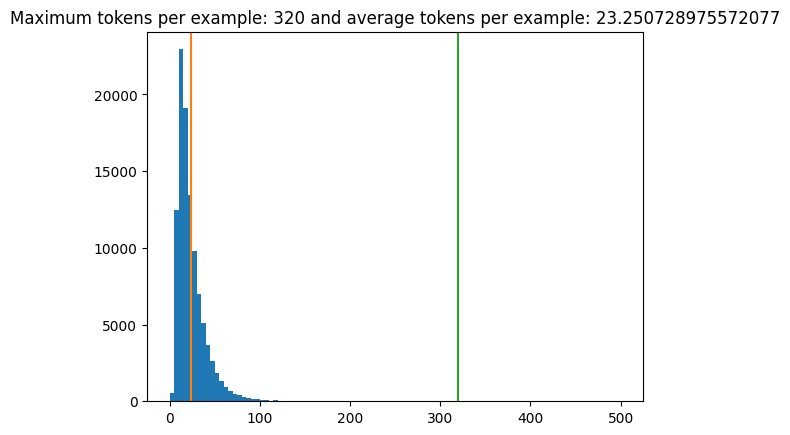

In [14]:
plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
avg_length = all_lengths.mean()
plt.plot([avg_length, avg_length], plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length} and average tokens per example: {avg_length}');

## 2.3. Set up a data pipeline

Let's write `prepare_batch()` function that prepares a batch of examples for training a machine translation model. The input to the function is a batch of Portuguese and English sentences, and the output is a tuple of two tensors representing the input and output sequences for the model.

First, the Portuguese sentences are tokenized using the `tokenizers.pt.tokenize()` method, which returns a ragged tensor representing the tokenized sentences. The code then trims the tensor to a maximum length of`MAX_TOKENS using the pt[:, :MAX_TOKENS]` syntax, which selects the first `MAX_TOKENS` tokens from each sentence. The resulting tensor is converted to a dense tensor with zero padding using the `pt.to_tensor()` method.

The English sentences are tokenized and trimmed in a similar way, but with an additional step. The `en[:, :(MAX_TOKENS+1)]` syntax selects the first `MAX_TOKENS+1` tokens from each sentence, which includes the start token [START] and end token [END]. The `en_inputs` tensor is created by selecting all but the last token from each sentence, which drops the end token. The `en_labels` tensor is created by selecting all but the first token from each sentence, which drops the start token.

Finally, the function returns a tuple of two tensors, `pt, en_inputs` and `en_labels`, which represent the input and output sequences for the machine translation model. These tensors can be used to train the model using techniques such as teacher forcing, where the model is trained to predict the next token in the output sequence given the input sequence and the ground truth output sequence up to that point.

In [15]:
MAX_TOKENS=128
def prepare_batch(pt, en):
    """
    Preprocess a batch of Portuguese and English sentences for training a machine translation model.

    Args:
        pt: A tensor of Portuguese sentences of shape (batch_size,) and dtype tf.string.
        en: A tensor of English sentences of shape (batch_size,) and dtype tf.string.

    Returns:
        A tuple of two tensors representing the input and output sequences for the model, and a tensor of shape
        (batch_size, max_length) representing the ground truth output sequences. The input sequence tensor has shape
        (batch_size, max_length) and dtype tf.int64, and the output sequence tensor has shape (batch_size, max_length)
        and dtype tf.int64.
    """
    pt = tokenizers.pt.tokenize(pt)      # Output is ragged.
    pt = pt[:, :MAX_TOKENS]    # Trim to MAX_TOKENS.
    pt = pt.to_tensor()  # Convert to 0-padded dense Tensor

    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:, :-1].to_tensor()  # Drop the [END] tokens
    en_labels = en[:, 1:].to_tensor()   # Drop the [START] tokens

    return (pt, en_inputs), en_labels

Now let's take dataset and converted it into batches that are ready to be fed to the model. 

The following function shuffles the examples in the dataset and batches them into batches of size `BATCH_SIZE`. It then applies the prepare_batch function to each batch, which tokenizes the text and prepares the input and output sequences for the model. Finally, it prefetches the batches to improve performance during training. The `BUFFER_SIZE` parameter determines the number of examples to load into memory for shuffling. The `tf.data.AUTOTUNE` argument allows TensorFlow to automatically tune the input pipeline for optimal performance.

In [16]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [17]:
def make_batches(ds):
  """
  This function takes a TensorFlow dataset 'ds' and processes it into batches that are ready to be fed to the model. 

  Parameters:
  ds (tf.data.Dataset): TensorFlow dataset to be processed into batches

  Returns:
  tf.data.Dataset: Processed and batched TensorFlow dataset

  """
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

Let's see if we did everything write by testing dataset

In [20]:
# Create training and validation set batches.
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

for (pt, en), en_labels in train_batches.take(1):
  break

print(f'pt.shape: {pt.shape}')
print(f'en_labels.shape: {en_labels.shape}')

pt.shape: (64, 128)
en_labels.shape: (64, 128)


The function `make_batches` prepares `tf.data.Dataset` objects for training a Keras model. The model is expected to take input in the form of pairs of tokenized Portuguese and English sequences `(pt, en)`, and predict the English sequences shifted by one token. This is known as "teacher forcing" because at each timestep, the model receives the true value as input for the next timestep regardless of its previous output. This is a simple and efficient way to train a text generation model as the outputs can be computed in parallel.

While one might expect the `input, output` pairs to simply be the `Portuguese, English` sequences, this setup adds "context" to the model by conditioning it on the Portuguese sequence. It is possible to train a model without conditioning it on the Portuguese sequence, but that would require writing an inference loop and passing the model's output back to the input. This is slower and harder to learn but can result in a more stable model as the model has to learn to correct its own errors during training.

The `en` and `en_labels` are the same, just shifted by 1:

In [18]:
print(f'en[0][:10]: {en[0][:10]}')
print(f'en_labels[0][:10]: {en_labels[0][:10]}')

## 2.4. Define the components

## References

[1] Vaswani, Ashish, et al. "Attention is all you need." Advances in neural information processing systems 30 (2017). 

[2] [https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4](https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4)

[3] [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer)


